In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('/content/titanic_dataset.csv',index_col = 'PassengerId')

In [37]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**UNDERSTANDING THE DATASET**

In [38]:
data.shape

(891, 11)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [40]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

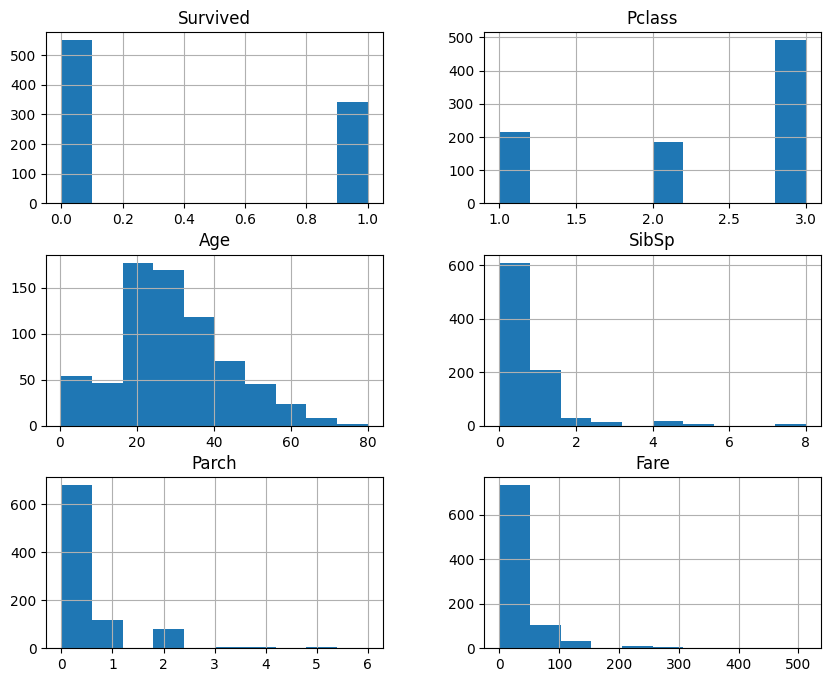

In [42]:
graph = data.select_dtypes(include=['float64','int64'])
graph.hist(figsize=(10,8))
plt.show()

**HANDLING MISSING VALUES**

In [43]:
# Age column has a right skewed distribution, so median filling

data['Age'] = data['Age'].fillna(data['Age'].median())

In [44]:
# Cabin is a categorical column, so mode filling
# Embarked is also categorical column, so mode filling

data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [45]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**HANDLING OUTLIERS**

In [46]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

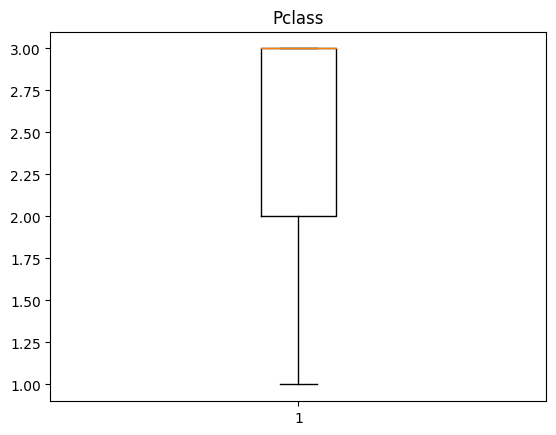

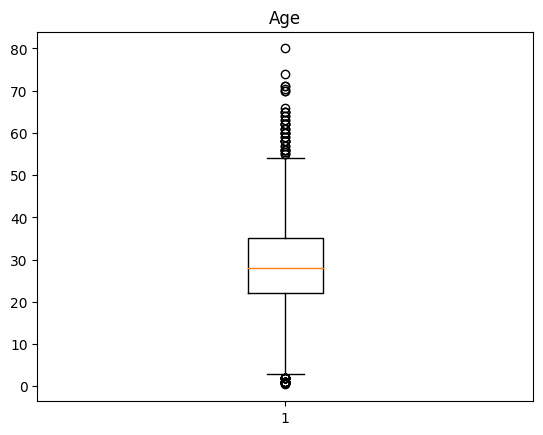

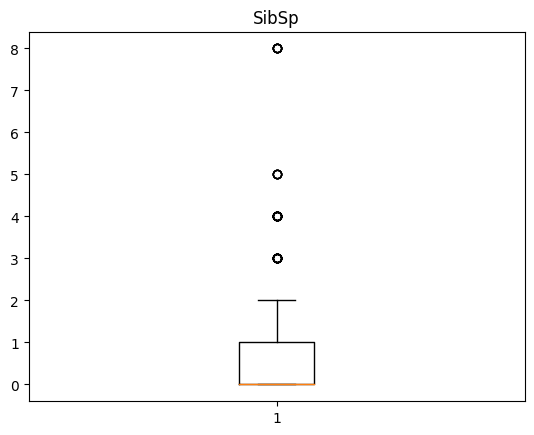

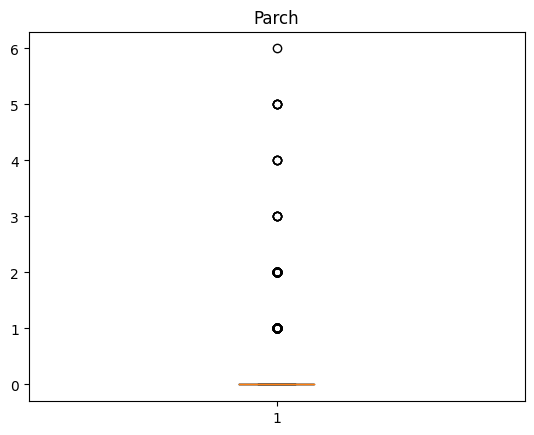

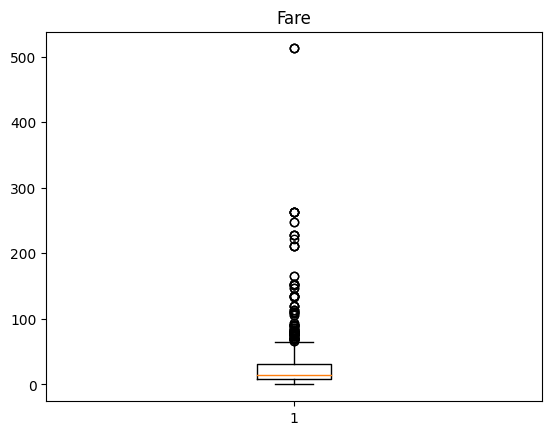

In [47]:
num_col = ['Pclass', 'Age', 'SibSp', 'Parch','Fare']

for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [55]:
columns = ['Age','SibSp','Fare']

def handle_outliers_iqr(data, columns):
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    # clipping
    data[x] = data[x].clip(lower=lower_lim, upper=upper_lim)
    outliers = data[(data[x] < lower_lim) | (data[x] > upper_lim)]

  return data


data = handle_outliers_iqr(data,columns)
data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2,W./C. 6607,23.4500,B96 B98,S


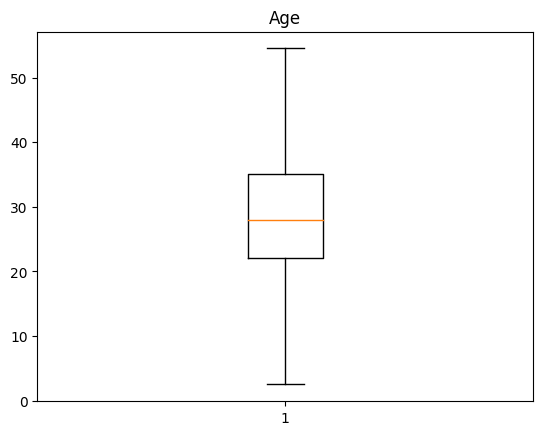

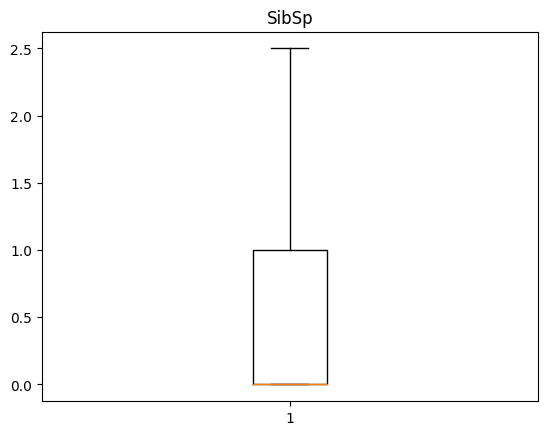

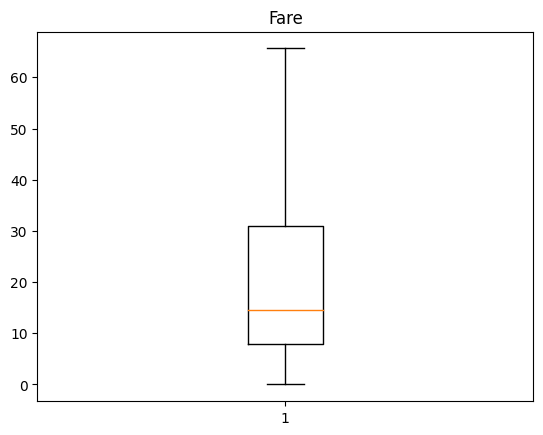

In [56]:
num_col = ['Age', 'SibSp','Fare']

for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [60]:
X = data.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [61]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


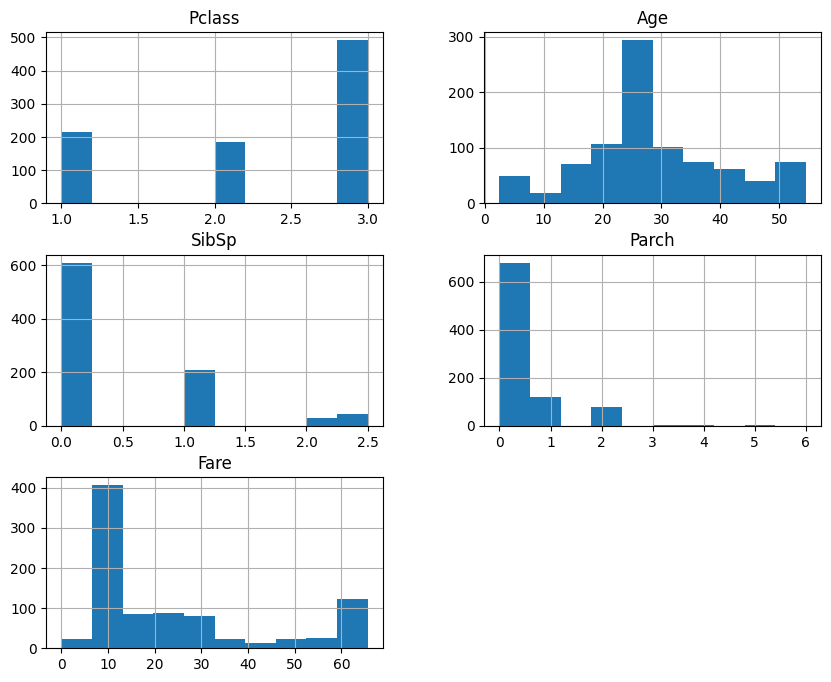

In [63]:
X.hist(figsize=(10,8))
plt.show()

**MIN - MAX SCALING**

In [66]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)
X_mm = pd.DataFrame(X_mm)

In [70]:
X_mm

,0,1,2,3,4
0,1.0,0.375000,0.4,0.000000,0.110460
1,0.0,0.682692,0.4,0.000000,1.000000
2,1.0,0.451923,0.0,0.000000,0.120745
3,0.0,0.625000,0.4,0.000000,0.809027
4,1.0,0.625000,0.0,0.000000,0.122649
...,...,...,...,...,...
886,0.5,0.471154,0.0,0.000000,0.198067
887,0.0,0.317308,0.0,0.000000,0.457077
888,1.0,0.490385,0.4,0.333333,0.357282
889,0.0,0.451923,0.0,0.000000,0.457077


In [71]:
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


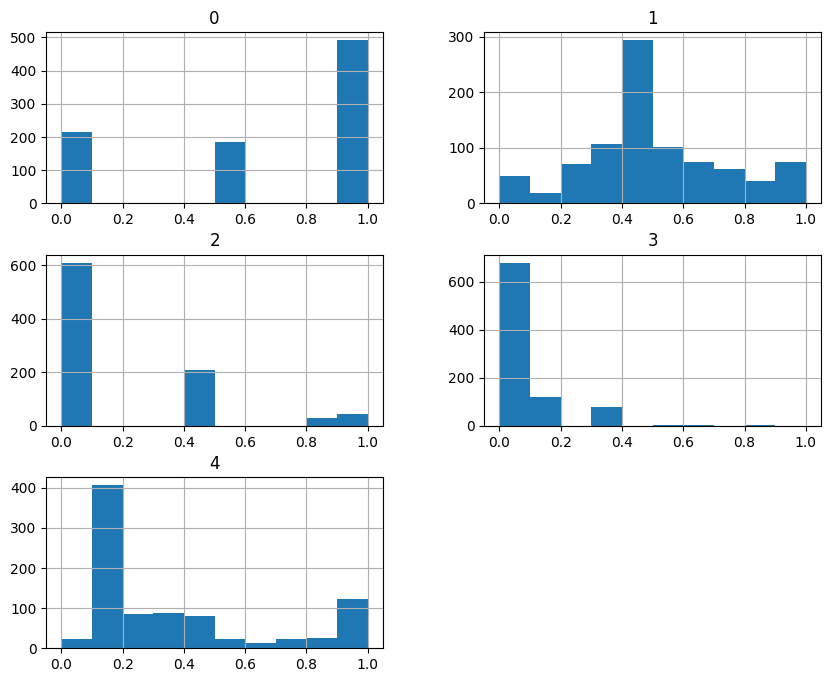

In [72]:
X_mm.hist(figsize=(10,8))
plt.show()